In [1]:
import pyart
import matplotlib.pyplot as plt


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



/Users/aditigarg/opt/anaconda3/envs/pywsrlib/lib/python3.8/site-packages/matplotlib/__init__.py:169: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(module.__version__) < minver:
/Users/aditigarg/opt/anaconda3/envs/pywsrlib/lib/python3.8/site-packages/setuptools/_distutils/version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/aditigarg/opt/anaconda3/envs/pywsrlib/lib/python3.8/site-packages/matplotlib/__init__.py:169: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(module.__version__) < minver:
/Users/aditigarg/opt/anaconda3/envs/pywsrlib/lib/python3.8/site-packages/setuptools/_distutils/version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/aditigarg/opt/anaconda3/envs/pywsrlib/lib

(3, 5, 600, 600)


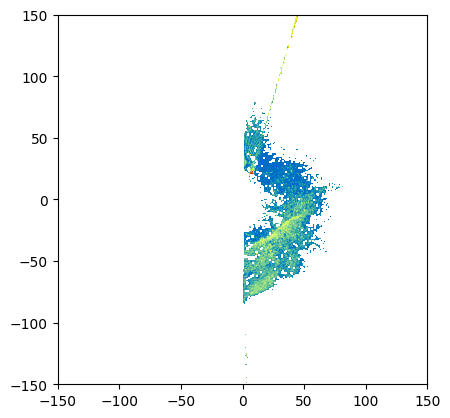

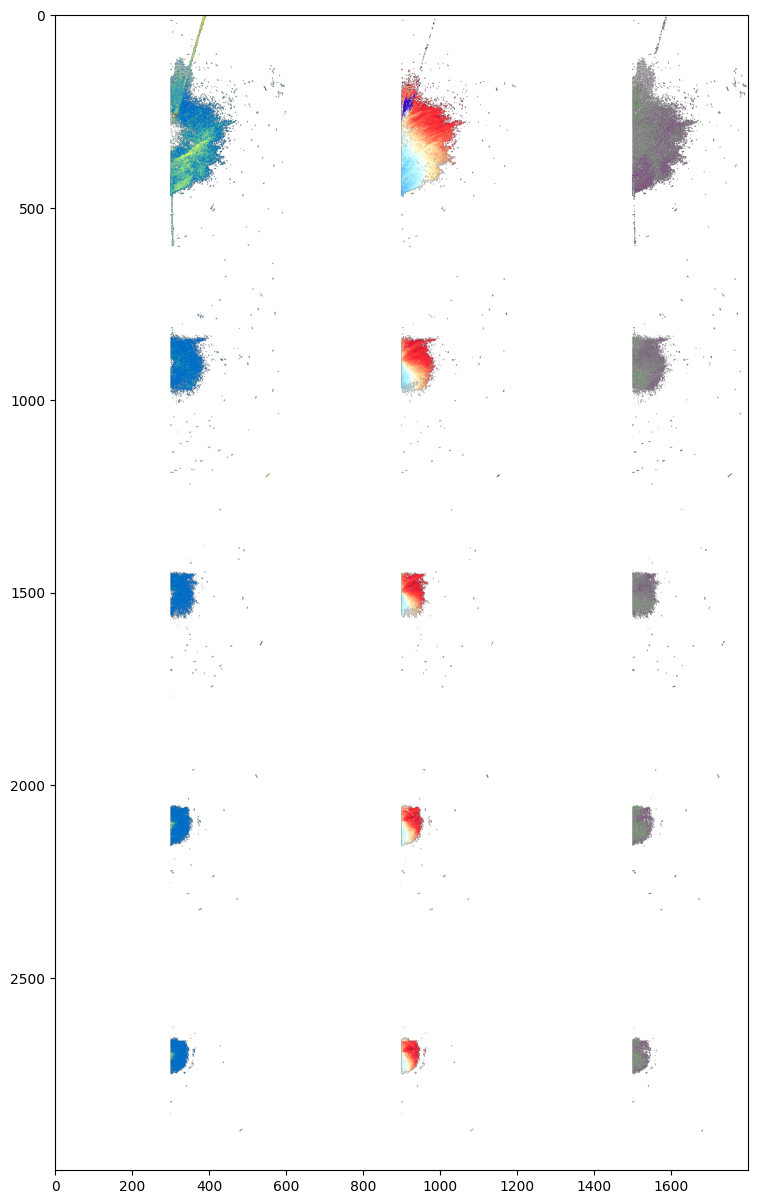

In [5]:
from wsrlib import radar2mat, volume_mosaic
from wsrlib.testing import DUALPOL_SCAN

field_names = {
    'DBZH' : 'reflectivity',
    'TH': 'total_power',
    'RHOHV': 'cross_correlation_ratio',
    'WRADH': 'spectrum_width',
    'PHIDP': 'differential_phase',
    'ZDR': 'differential_reflectivity',
    'KDP': 'specific_differential_phase',
    'VRADH': 'velocity'
}

radar = pyart.aux_io.read_odim_h5(
    f'data/canada_radar_data/2022060100_00_ODIMH5_PVOL6S_VOL_CASET.h5',
    field_names=field_names)

# Convert radar to 4d array
data, fields, elev, y, x = radar2mat(radar,
                                     coords='cartesian', 
                                     dim=600, 
                                     r_max=150000,
                                     fields=["reflectivity", "velocity", "spectrum_width"],
                                     elevs=[0.5, 1.5, 2.5, 3.5, 4.5])

print(data.shape)

# View one sweep: reflectivity at lowest elevation
plt.imshow(data[0,0,:,:],
           extent = (x[0]/1000, x[-1]/1000, y[0]/1000, y[-1]/1000),
           origin='lower', 
           vmin=-5, vmax=35,
           cmap=pyart.config.get_field_colormap('reflectivity'))

# # View one sweep: velocity at lowest elevation
# plt.imshow(data[1,0,:,:],
#            extent = (x[0]/1000, x[-1]/1000, y[0]/1000, y[-1]/1000),
#            origin='lower', 
#            vmin=-5, vmax=35,
#            cmap=pyart.config.get_field_colormap('velocity'))

# View whole volume scan as mosaic
mosaic_im = volume_mosaic(data, fields)
fig, ax = plt.subplots(figsize=(len(fields)*3, len(elev)*3))
ax.imshow(mosaic_im)